# Ted Talks | Wrangling

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load data and make into datafame
df = pd.read_csv("../ga_tedtalks/ted_main.csv")

In [3]:
#review dataset
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [4]:
#review shape of dataset
df.shape

(2550, 17)

In [5]:
#review columns to consider features and prediction questions
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
#count the number of missing values
df.isnull().sum()
#there are only 6 missing columns, that is great!

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### Tags


tags: The themes associated with the talk. #count vectorizer 

In [8]:
df.tags.head(10)

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
5    ['business', 'culture', 'entertainment', 'goal...
6    ['Christianity', 'God', 'atheism', 'comedy', '...
7    ['architecture', 'collaboration', 'culture', '...
8    ['God', 'TED Brain Trust', 'atheism', 'brain',...
9    ['Christianity', 'God', 'culture', 'happiness'...
Name: tags, dtype: object

In [9]:
tags = df.tags

countv = CountVectorizer(max_features=100)

tag_dtm = countv.fit_transform(tags)

In [10]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

,activism,africa,animals,architecture,art,beauty,big,biodiversity,biology,biotech,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
tag_df.shape

(2550, 100)

### Rating Column

Adding a rating column to better visualize data and do comparisons

In [12]:
df_ordered = df[["title","views","duration", "comments", "num_speaker","film_date", "tags"]].sort_values('views', ascending=False)
df_ordered

,title,views,duration,comments,num_speaker,film_date,tags
0,Do schools kill creativity?,47227110,1164,4553,1,1140825600,"['children', 'creativity', 'culture', 'dance',..."
1346,Your body language may shape who you are,43155405,1262,2290,1,1340668800,"['body language', 'brain', 'business', 'psycho..."
677,How great leaders inspire action,34309432,1084,1930,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,31168150,1219,1927,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi..."
452,10 things you didn't know about orgasm,22270883,1003,354,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie..."
1776,How to speak so that people want to listen,21594632,598,297,1,1370822400,"['culture', 'sound', 'speech']"
201,My stroke of insight,21190883,1099,2877,1,1204070400,"['biology', 'brain', 'consciousness', 'global ..."
5,Why we do what we do,20685401,1305,672,1,1138838400,"['business', 'culture', 'entertainment', 'goal..."
2114,This is what happens when you reply to spam email,20475972,588,150,1,1449532800,"['comedy', 'communication', 'curiosity', 'humo..."
1416,"Looks aren't everything. Believe me, I'm a model.",19787465,577,846,1,1351296000,"['TEDx', 'beauty', 'culture', 'fashion', 'phot..."


In [13]:
df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [14]:
df_rank.head()

0       1.0
1346    2.0
677     3.0
837     4.0
452     5.0
Name: views, dtype: float64

In [15]:
df["rank"] = df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [16]:
# df_rank

In [17]:
df_ordered['rank'] = df['rank'].rank(ascending=True)

In [18]:
df_ordered.head()

,title,views,duration,comments,num_speaker,film_date,tags,rank
0,Do schools kill creativity?,47227110,1164,4553,1,1140825600,"['children', 'creativity', 'culture', 'dance',...",1.0
1346,Your body language may shape who you are,43155405,1262,2290,1,1340668800,"['body language', 'brain', 'business', 'psycho...",2.0
677,How great leaders inspire action,34309432,1084,1930,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh...",3.0
837,The power of vulnerability,31168150,1219,1927,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi...",4.0
452,10 things you didn't know about orgasm,22270883,1003,354,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie...",5.0


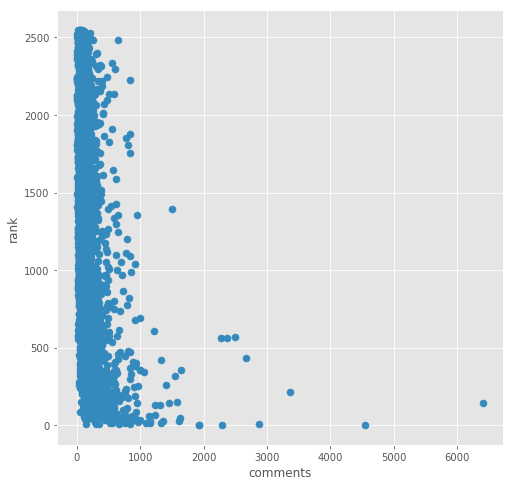

In [19]:
df.plot(kind = 'scatter', x = 'comments', y = 'rank', s = 50, figsize = (8,8))

In [20]:
#lm plot with seaborn and doing a regression line

In [21]:
# sns.lmplot(x = "duration", y = "views", data = df_ordered, x_estimator=np.mea)

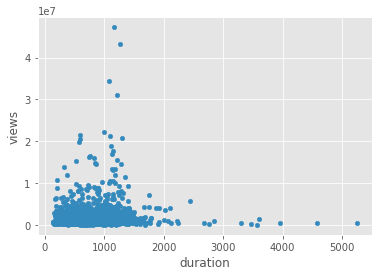

In [22]:
df.plot(kind = 'scatter', x = 'duration', y ='views')

In [23]:
df_ordered.tags.head(10)

0       ['children', 'creativity', 'culture', 'dance',...
1346    ['body language', 'brain', 'business', 'psycho...
677     ['TEDx', 'business', 'entrepreneur', 'leadersh...
837     ['TEDx', 'communication', 'culture', 'depressi...
452     ['books', 'culture', 'history', 'humor', 'scie...
1776                       ['culture', 'sound', 'speech']
201     ['biology', 'brain', 'consciousness', 'global ...
5       ['business', 'culture', 'entertainment', 'goal...
2114    ['comedy', 'communication', 'curiosity', 'humo...
1416    ['TEDx', 'beauty', 'culture', 'fashion', 'phot...
Name: tags, dtype: object

In [24]:
tags = df_ordered.tags

countv = CountVectorizer(max_features=100) #top 100 tags used

tag_dtm = countv.fit_transform(tags)

In [25]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

,activism,africa,animals,architecture,art,beauty,big,biodiversity,biology,biotech,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
tag_df.shape

(2550, 100)

In [27]:
#top tags used for ted talks
# tag_df.sum().sort_values(ascending=False)

In [28]:
df_ordered_tags = pd.concat([ df_ordered, tag_df], axis = 1)

In [29]:
df_data = df_ordered_tags.drop(['tags', 'title', 'rank', 'film_date'], axis = 1)

In [30]:
df_data.head()

,views,duration,comments,num_speaker,activism,africa,animals,architecture,art,beauty,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,47227110,1164,4553,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,977,265,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,1286,124,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1697550,1116,200,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12005869,1190,593,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df_data.shape

(2550, 104)

In [32]:
# df_data.dtypes

### Set up Model

In [33]:
# y = df_data["views"] #target variable
# X = df_data.drop("views", axis=1) #predictors

In [34]:
# # STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [35]:
# assert X.shape[0] == y.shape[0]  #check that they are the same

In [36]:
# print (X_train.shape)
# print (y_train.shape)

### Linear Regression


In [37]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

In [38]:
# predictions = lm.predict(X_train)
# train_score = lm.score(X_train, y_train)
# test_score = lm.score(X_test, y_test)

# plt.figure(figsize=(8,8))
# plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values from Views")
# plt.ylabel("Actual Values ")
# plt.show()

# print ("score: ", score)

In [39]:
# sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)[source]
# sklearn.metrics.mean_squared_error(y_test, predictions)

### Using Ridge Model


In [40]:
y = df_data["views"] #target variable
X = df_data.drop("views", axis=1) #predictors

In [41]:
df_data.views.shape

(2550,)

In [42]:
print(X.shape)
y.shape

(2550, 103)


(2550,)

In [43]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)

assert X.shape[0] == y.shape[0]  #check that they are the same

print (X_train.shape)
print (y_train.shape)

(637, 103)
(637,)


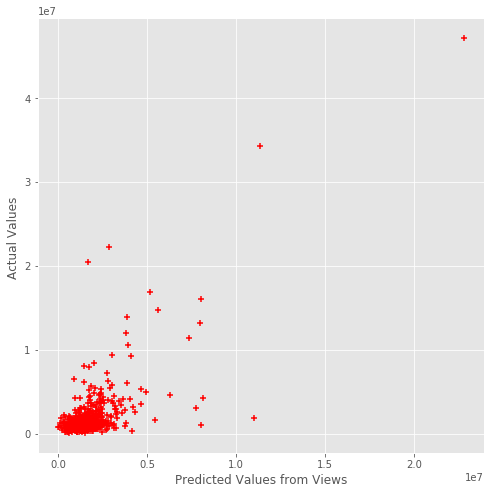

score:  0.4442641531518107


In [44]:
# TRAINING SET
lmr = Ridge()
lmr.fit(X, y) 

# train_score = lm.score(X_train, y_train)
# test_score = lm.score(X_test, y_test)

predictions = lmr.predict(X_train)
score = lmr.score(X_train, y_train)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

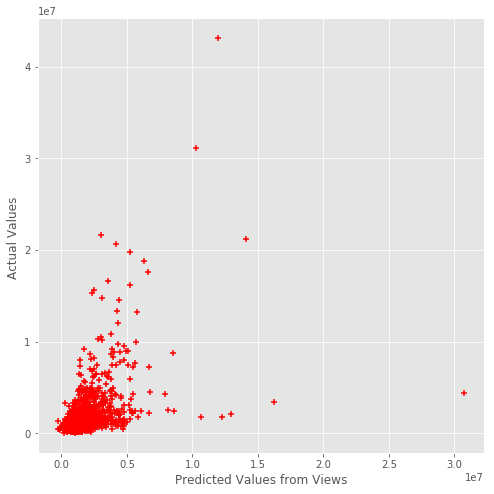

score:  0.22000735153815631


In [45]:
#TEST SET
lmr = Ridge()
lmr.fit(X, y) 

predictions = lmr.predict(X_test)
score = lmr.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

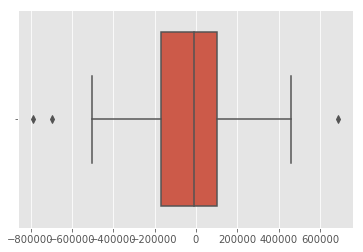

In [46]:
sns.boxplot(lmr.coef_)

In [47]:
from sklearn.datasets import make_regression

In [48]:
X, y = make_regression(n_features=2, random_state=0)
regr = Ridge(random_state=0)
regr.fit(X, y)

print(regr.coef_) 

print(regr.intercept_) 

print(regr.predict([[0, 0]])) 


[28.91235667 95.27418218]
0.042295152852073414
[0.04229515]


In [49]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X,y)       

reg.alpha_  

0.1

In [50]:
#Intialize vectorizer object
vect = CountVectorizer()

#Fit and transform with training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data
X_test_dtm = vect.transform(X_test)